<a href="https://colab.research.google.com/github/Derevenitckaia/ML_itmo_course/blob/main/task_6_logistic_regress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
     

# Задача 1

В прилагаемом файле представлены данные, собранные путем голосования за самые лучшие (или, по крайней мере, самые популярные) конфеты Хэллоуина. Обучите модель логистической регрессии. В качестве предикторов выступают поля: chocolate, fruity, caramel, peanutyalmondy, nougat, crispedricewafer, hard, bar, pluribus, sugarpercent, pricepercent, отклик — Y.

В качестве тренировочного набора данных используйте данные из файла, за иключением следующих конфет: Dots, Fun Dip, Milky Way Midnight. Обучите модель.

Обучите модель и выполните предсказание для всех конфет из прилагаемого файла тестовых данных.

In [2]:
path_train = 'https://courses.openedu.ru/assets/courseware/v1/a11f0b9cb0074fdacc112eee71eb0b67/asset-v1:ITMOUniversity+INTROMLADVML+fall_2022_ITMO+type@asset+block/candy-data.csv'
path_test = 'https://courses.openedu.ru/assets/courseware/v1/d53b0f8b959d03cc84a992f6070cabc6/asset-v1:ITMOUniversity+INTROMLADVML+fall_2022_ITMO+type@asset+block/candy-test.csv'
df_train_full = pd.read_csv(path_train)
df_test = pd.read_csv(path_test)
df_test


,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,Y
0,Sugar Babies,0,1,1,0,0,0,1,0,1,0.647364,0.76700,0
1,Sugar Daddy,1,0,0,0,1,0,1,0,0,0.418000,0.32500,0
2,Super Bubble,0,1,0,0,0,0,0,0,0,0.162000,0.11600,0
3,Swedish Fish,0,1,0,0,0,0,0,0,1,0.604000,0.75500,1
4,Tootsie Pop,1,0,0,0,0,0,0,0,0,0.876560,0.56540,1
5,Tootsie Roll Juniors,1,0,0,0,0,0,0,0,0,0.313000,0.51100,0
6,Tootsie Roll Midgies,1,0,0,0,0,0,0,0,1,0.174000,0.01100,0
7,Tootsie Roll Snack Bars,1,0,0,0,0,0,0,1,0,0.465000,0.32500,1
8,Trolli Sour Bites,0,1,0,0,0,0,0,0,1,0.313000,0.25500,0
9,Twix,0,1,0,0,0,0,0,0,0,0.735430,0.86634,1


In [3]:
df_train = df_train_full.query("competitorname not in ['Dots', 'Fun Dip', 'Milky Way Midnight']")
df_train.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,Y
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,1
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,1
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,0
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,0
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,1


In [11]:
X_train = df_train.drop(['Y', 'competitorname', 'winpercent'], axis=1)
Y_train = df_train.Y

X_test = df_test.drop(['Y', 'competitorname'], axis=1)
print(X_train.shape, X_test.shape)

log_model = LogisticRegression(random_state = 2019, solver = 'lbfgs').fit(X_train, Y_train)
new_df_test = pd.read_csv(path_test)
new_df_test['new_Y'] = log_model.predict(X_test)
new_df_test['winpercent'] = log_model.predict_proba(X_test)[:,1]
new_df_test


(67, 11) (15, 11)


,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,Y,new_Y,winpercent
0,Sugar Babies,0,1,1,0,0,0,1,0,1,0.647364,0.76700,0,0,0.289118
1,Sugar Daddy,1,0,0,0,1,0,1,0,0,0.418000,0.32500,0,0,0.339076
2,Super Bubble,0,1,0,0,0,0,0,0,0,0.162000,0.11600,0,0,0.356092
3,Swedish Fish,0,1,0,0,0,0,0,0,1,0.604000,0.75500,1,0,0.411219
4,Tootsie Pop,1,0,0,0,0,0,0,0,0,0.876560,0.56540,1,1,0.755700
5,Tootsie Roll Juniors,1,0,0,0,0,0,0,0,0,0.313000,0.51100,0,1,0.682230
6,Tootsie Roll Midgies,1,0,0,0,0,0,0,0,1,0.174000,0.01100,0,1,0.654890
7,Tootsie Roll Snack Bars,1,0,0,0,0,0,0,1,0,0.465000,0.32500,1,1,0.771990
8,Trolli Sour Bites,0,1,0,0,0,0,0,0,1,0.313000,0.25500,0,0,0.368432
9,Twix,0,1,0,0,0,0,0,0,0,0.735430,0.86634,1,0,0.441922


#  Метрика качества для двухклассовой классификации
Выполните оценку модели с помощью матрицы ошибок и рассчитайте следующие параметры при пороге отсечения 0.5 (Treshhold).

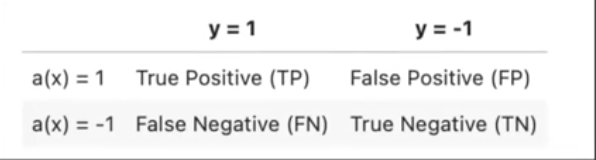

In [13]:
from sklearn.metrics import confusion_matrix
confusion_matrix(df_test.Y, log_model.predict(X_test))

array([[7, 3],
       [2, 3]])

#Precision
\begin{align}
precision = \frac{TP}{(TP + FP) }
\end{align}

In [14]:
from sklearn.metrics import precision_score
precision_score(df_test.Y, log_model.predict(X_test))

0.5

# Recall

\begin{align}
rercall = \frac{TP}{(TP + FN) }
\end{align}

In [15]:
from sklearn.metrics import recall_score
recall_score(df_test.Y, log_model.predict(X_test))

0.6

# AUC and ROC-curve

\begin{align}
FPR = \frac{FP}{(FP + TN) }
\end{align}
\begin{align}
TPR = \frac{TP}{(TP + FN) }
\end{align}



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


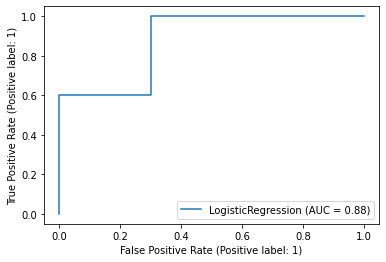

In [18]:
from sklearn.metrics import roc_curve, plot_roc_curve
import matplotlib.pyplot as plt
# fpr, tpr, thresholds = roc_curve(df_test.Y, log_model.predict_proba(X_test)[:,1])
# plt.plot(fpr, tpr)
# plt.title('ROC-Curve')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.show()

plot_roc_curve(log_model, X_test, df_test.Y)